# Part 1: Exploratory Data Analysis (EDA)
## Bank Marketing Dataset

**Objective:** Understand the structure and distribution of the bank marketing dataset to predict term deposit subscriptions.

**Dataset:** Portuguese bank direct marketing campaigns based on phone calls.

**Target Variable:** Whether the client will subscribe to a term deposit (y: yes/no)

---

## 1. Import Required Libraries

Importing essential libraries for data manipulation, visualization, and analysis.

In [2]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Configure visualization settings
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Set figure size for matplotlib
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Dataset

Loading the bank marketing dataset and displaying initial observations.

In [3]:
# Load the dataset
df = pd.read_csv('bank-full.csv', sep=',')

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Dataset shape: (45211, 17)

First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 3. Understand Dataset Structure

Analyzing the basic structure, data types, and summary statistics of the dataset.

In [4]:
# Dataset basic information
print("=== DATASET INFORMATION ===")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== DATA TYPES ===")
print(df.dtypes)

print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

=== DATASET INFORMATION ===
Number of rows: 45,211
Number of columns: 17

Memory usage: 25.75 MB

=== DATA TYPES ===
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

=== MISSING VALUES ===
No missing values found!


In [5]:
# Detailed dataset information
print("=== DETAILED DATASET INFO ===")
df.info()

print("\n=== UNIQUE VALUES PER COLUMN ===")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

=== DETAILED DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

=== UNIQUE VALUES PER COLUMN ===
age: 77 unique values
job: 12 uniqu

In [6]:
# Summary statistics for numerical variables
print("=== SUMMARY STATISTICS (NUMERICAL VARIABLES) ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols].describe()

=== SUMMARY STATISTICS (NUMERICAL VARIABLES) ===


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# Summary for categorical variables
print("=== CATEGORICAL VARIABLES OVERVIEW ===")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"Unique values: {df[col].unique()}")
    print(f"Value counts:")
    print(df[col].value_counts())
    print("-" * 50)

=== CATEGORICAL VARIABLES OVERVIEW ===

JOB:
Unique values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Value counts:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
--------------------------------------------------

MARITAL:
Unique values: ['married' 'single' 'divorced']
Value counts:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
--------------------------------------------------

EDUCATION:
Unique values: ['tertiary' 'secondary' 'unknown' 'primary']
Value counts:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
-----------------------

## 4. Visualize Feature Distributions

Exploring the distributions of both numerical and categorical features using various visualization techniques.

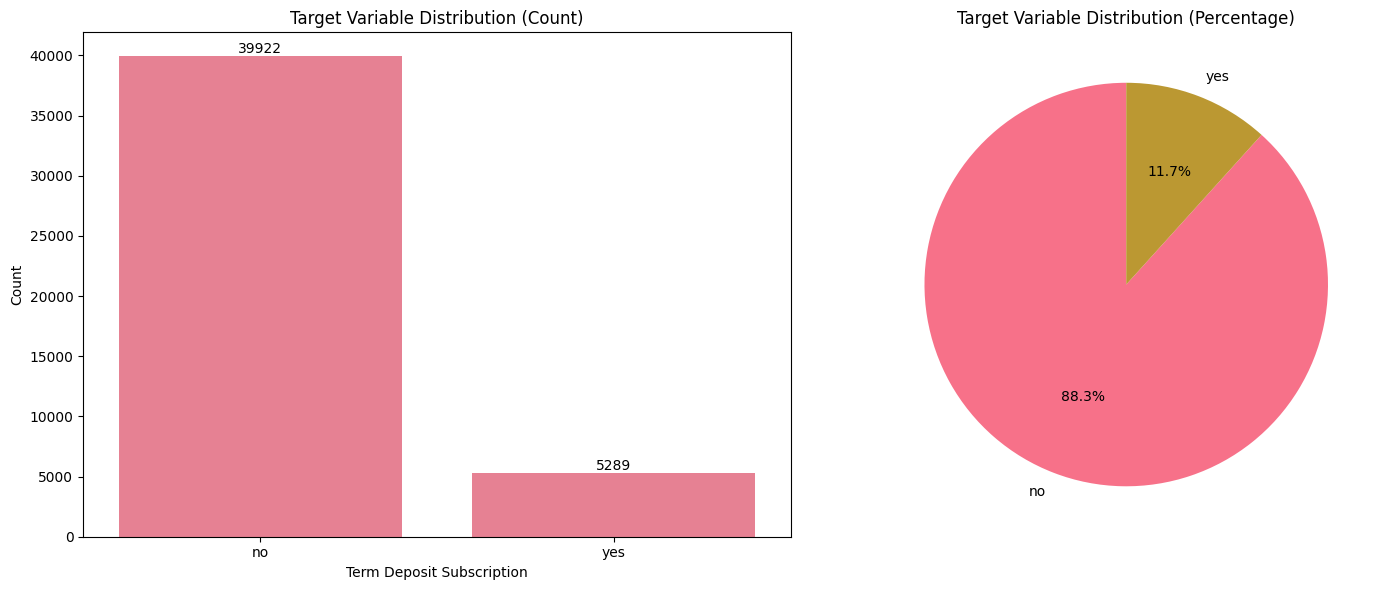


=== TARGET VARIABLE STATISTICS ===
Total observations: 45,211
Subscriptions (yes): 5,289 (11.7%)
No subscriptions (no): 39,922 (88.3%)


In [8]:
# Target variable distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
sns.countplot(data=df, x='y', ax=ax1)
ax1.set_title('Target Variable Distribution (Count)')
ax1.set_xlabel('Term Deposit Subscription')
ax1.set_ylabel('Count')

# Add count labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')

# Pie chart
target_counts = df['y'].value_counts()
ax2.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Target Variable Distribution (Percentage)')

plt.tight_layout()
plt.show()

print("\n=== TARGET VARIABLE STATISTICS ===")
print(f"Total observations: {len(df):,}")
print(f"Subscriptions (yes): {target_counts['yes']:,} ({target_counts['yes']/len(df)*100:.1f}%)")
print(f"No subscriptions (no): {target_counts['no']:,} ({target_counts['no']/len(df)*100:.1f}%)")

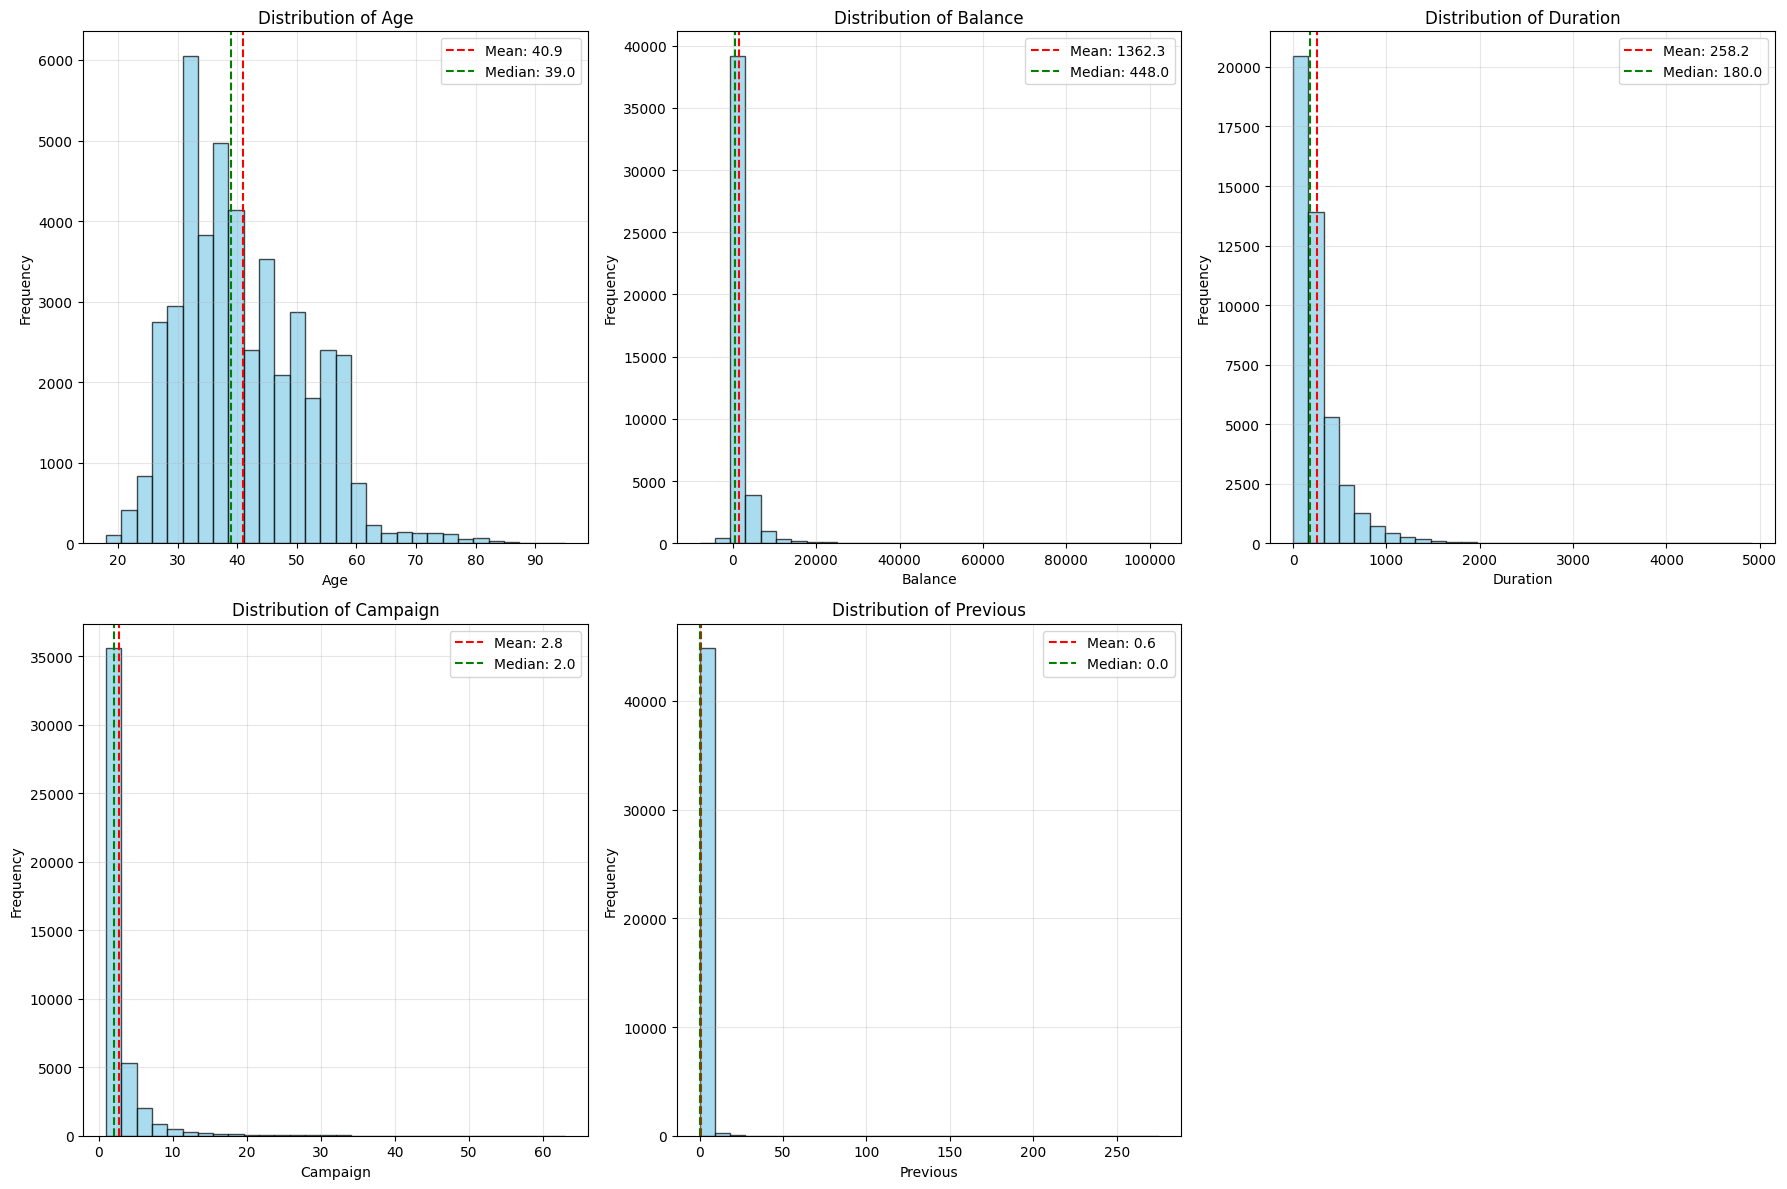


=== NUMERICAL FEATURES STATISTICS ===

AGE:
  Mean: 40.94
  Median: 39.00
  Std: 10.62
  Min: 18
  Max: 95

BALANCE:
  Mean: 1362.27
  Median: 448.00
  Std: 3044.77
  Min: -8019
  Max: 102127

DURATION:
  Mean: 258.16
  Median: 180.00
  Std: 257.53
  Min: 0
  Max: 4918

CAMPAIGN:
  Mean: 2.76
  Median: 2.00
  Std: 3.10
  Min: 1
  Max: 63

PREVIOUS:
  Mean: 0.58
  Median: 0.00
  Std: 2.30
  Min: 0
  Max: 275


In [9]:
# Numerical features distribution
numerical_features = ['age', 'balance', 'duration', 'campaign', 'previous']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Histogram
    axes[i].hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature.title()}')
    axes[i].set_xlabel(feature.title())
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)
    
    # Add statistics text
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}')
    axes[i].legend()

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Print numerical statistics
print("\n=== NUMERICAL FEATURES STATISTICS ===")
for feature in numerical_features:
    print(f"\n{feature.upper()}:")
    print(f"  Mean: {df[feature].mean():.2f}")
    print(f"  Median: {df[feature].median():.2f}")
    print(f"  Std: {df[feature].std():.2f}")
    print(f"  Min: {df[feature].min()}")
    print(f"  Max: {df[feature].max()}")

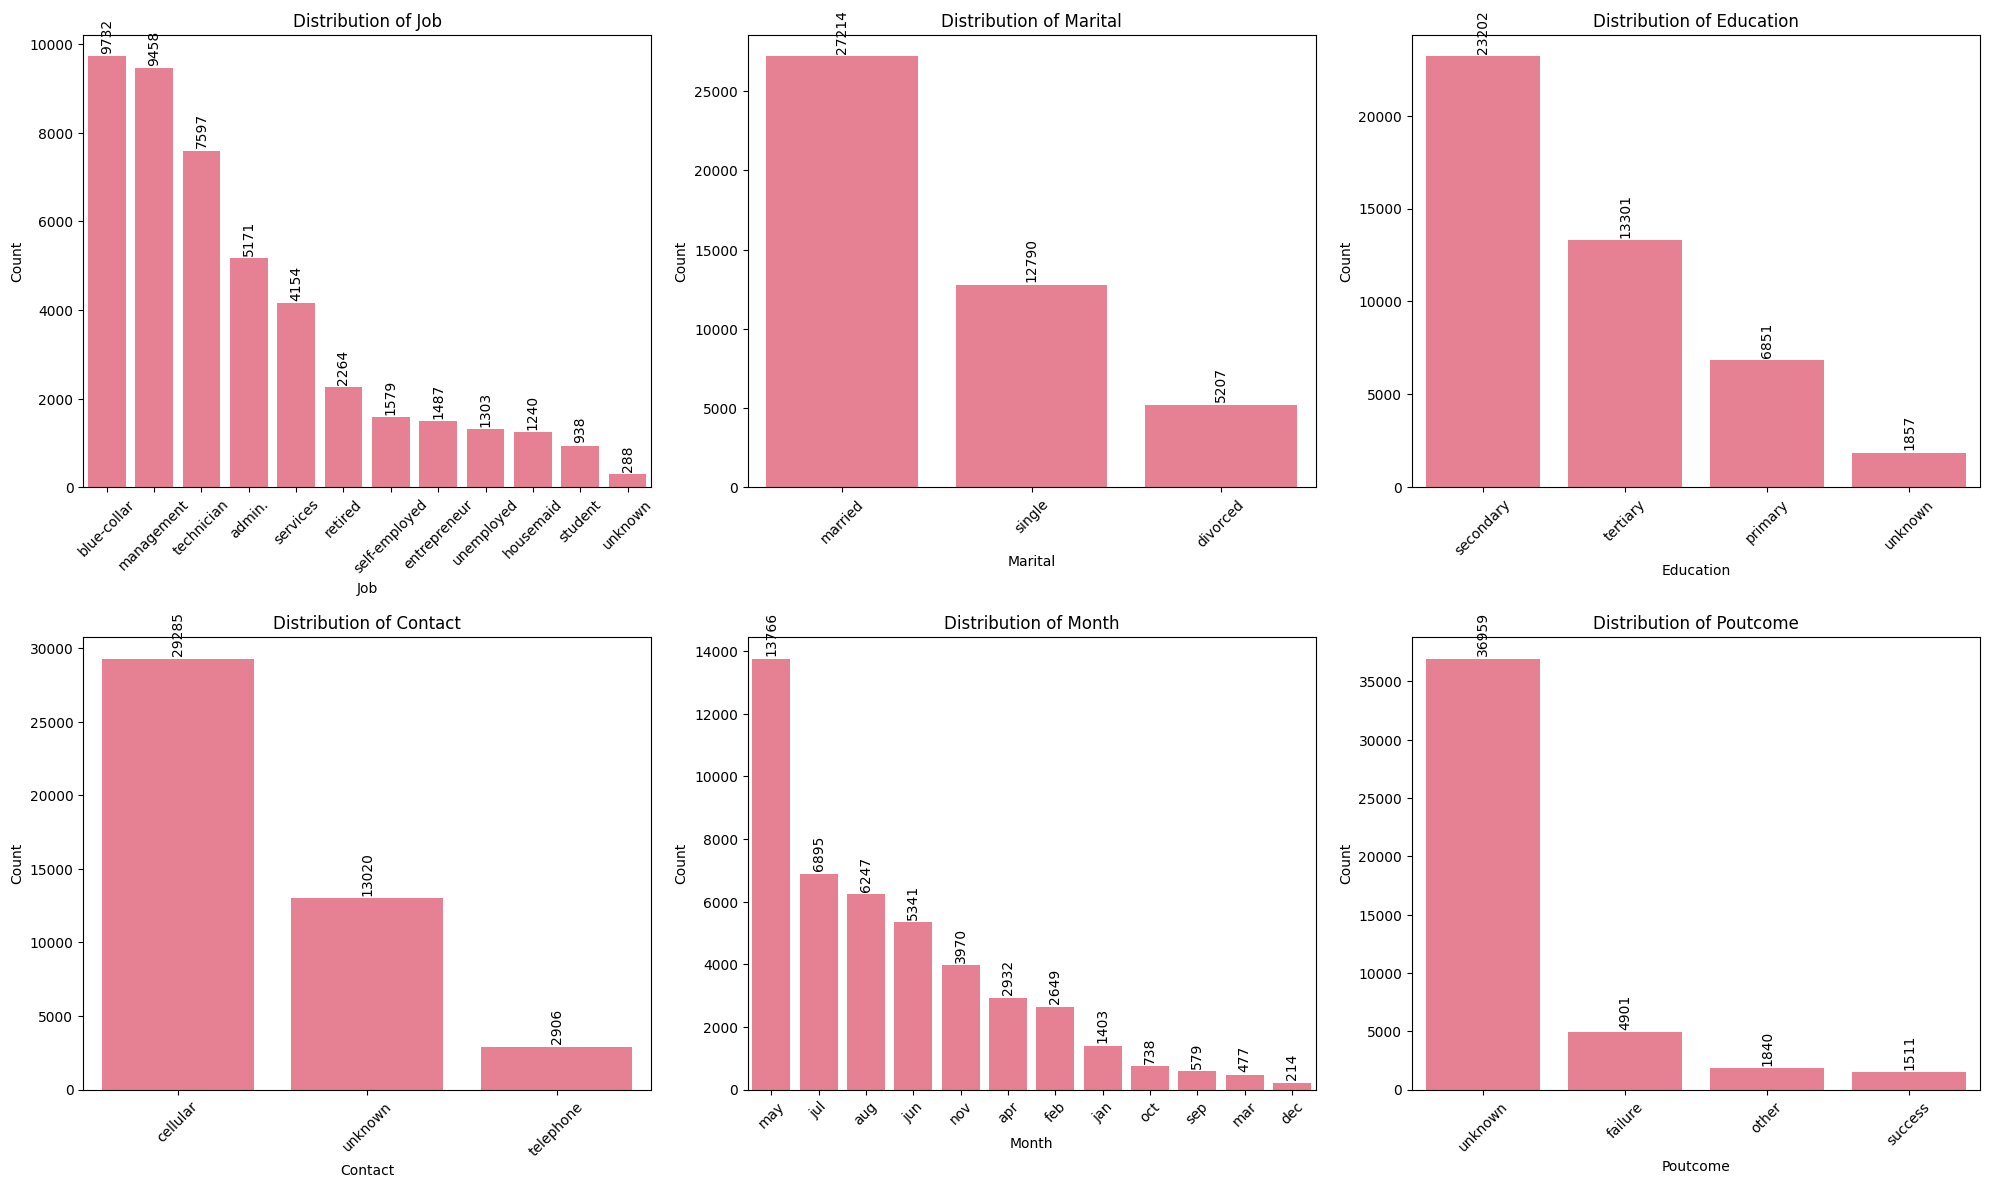


=== CATEGORICAL FEATURES STATISTICS ===

JOB:
  blue-collar: 9,732 (21.5%)
  management: 9,458 (20.9%)
  technician: 7,597 (16.8%)
  admin.: 5,171 (11.4%)
  services: 4,154 (9.2%)

MARITAL:
  married: 27,214 (60.2%)
  single: 12,790 (28.3%)
  divorced: 5,207 (11.5%)

EDUCATION:
  secondary: 23,202 (51.3%)
  tertiary: 13,301 (29.4%)
  primary: 6,851 (15.2%)
  unknown: 1,857 (4.1%)

CONTACT:
  cellular: 29,285 (64.8%)
  unknown: 13,020 (28.8%)
  telephone: 2,906 (6.4%)

MONTH:
  may: 13,766 (30.4%)
  jul: 6,895 (15.3%)
  aug: 6,247 (13.8%)
  jun: 5,341 (11.8%)
  nov: 3,970 (8.8%)

POUTCOME:
  unknown: 36,959 (81.7%)
  failure: 4,901 (10.8%)
  other: 1,840 (4.1%)
  success: 1,511 (3.3%)


In [10]:
# Categorical features visualization
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Count plot
    order = df[feature].value_counts().index
    sns.countplot(data=df, x=feature, order=order, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature.title()}')
    axes[i].set_xlabel(feature.title())
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add count labels on bars
    for container in axes[i].containers:
        axes[i].bar_label(container, rotation=90, padding=2)

plt.tight_layout()
plt.show()

# Print categorical statistics
print("\n=== CATEGORICAL FEATURES STATISTICS ===")
for feature in categorical_features:
    print(f"\n{feature.upper()}:")
    value_counts = df[feature].value_counts()
    for value, count in value_counts.head().items():
        percentage = (count / len(df)) * 100
        print(f"  {value}: {count:,} ({percentage:.1f}%)")

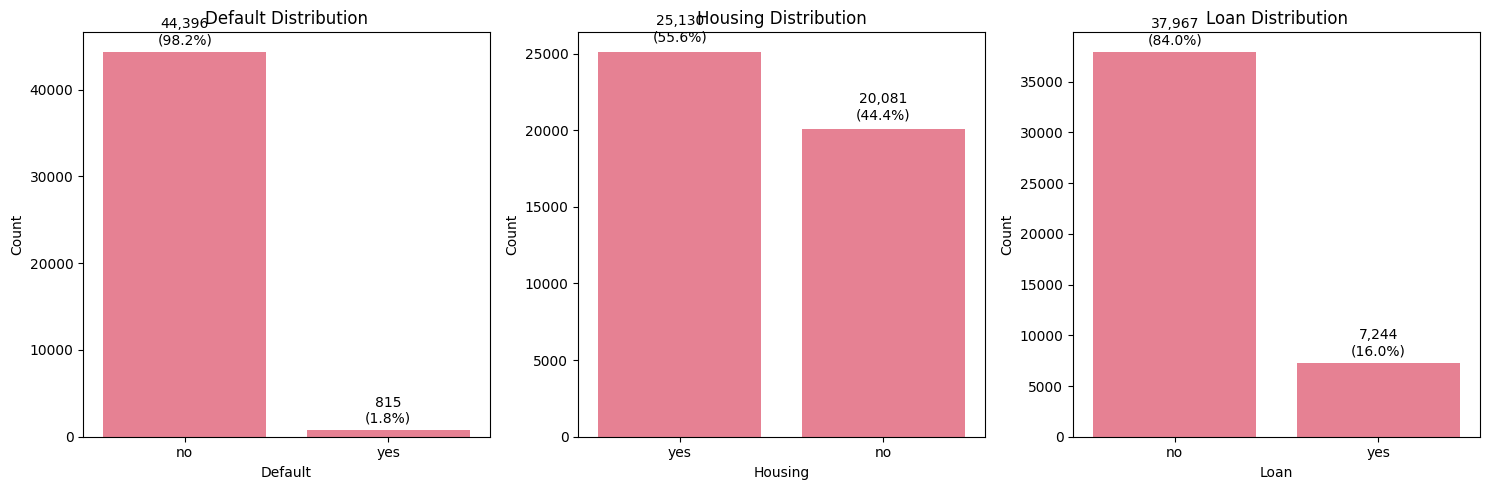


=== BINARY FEATURES STATISTICS ===

DEFAULT:
  no: 44,396 (98.2%)
  yes: 815 (1.8%)

HOUSING:
  yes: 25,130 (55.6%)
  no: 20,081 (44.4%)

LOAN:
  no: 37,967 (84.0%)
  yes: 7,244 (16.0%)


In [11]:
# Binary features analysis
binary_features = ['default', 'housing', 'loan']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(binary_features):
    # Count plot
    sns.countplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'{feature.title()} Distribution')
    axes[i].set_xlabel(feature.title())
    axes[i].set_ylabel('Count')
    
    # Add percentage labels
    total = len(df)
    for container in axes[i].containers:
        for bar in container:
            height = bar.get_height()
            percentage = f'{(height/total)*100:.1f}%'
            axes[i].text(bar.get_x() + bar.get_width()/2., height + total*0.01,
                        f'{int(height):,}\n({percentage})', 
                        ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n=== BINARY FEATURES STATISTICS ===")
for feature in binary_features:
    print(f"\n{feature.upper()}:")
    value_counts = df[feature].value_counts()
    for value, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {value}: {count:,} ({percentage:.1f}%)")

## 5. Feature Relationships with Target Variable

Analyzing how different features relate to the target variable (term deposit subscription).

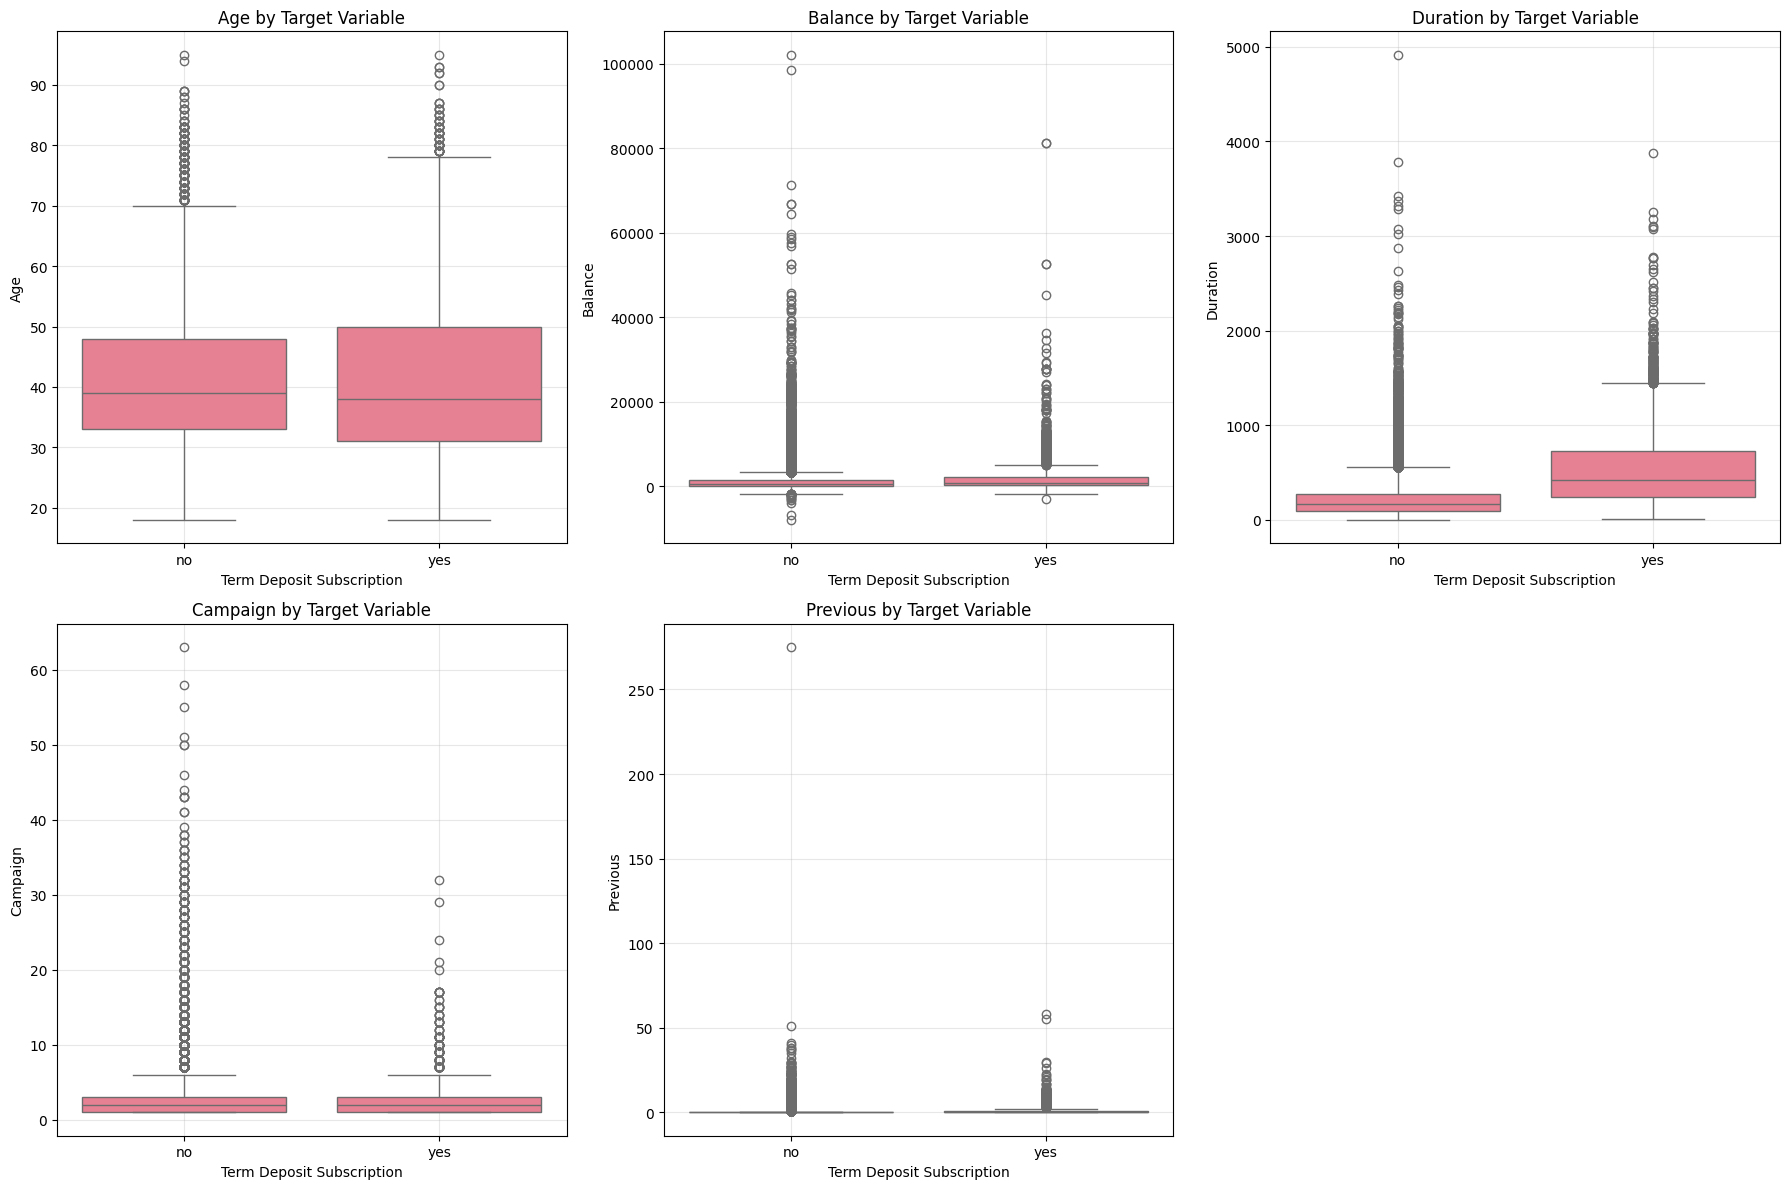


=== NUMERICAL FEATURES BY TARGET VARIABLE ===

AGE:
  Mean (yes): 41.67
  Mean (no): 40.84
  Difference: 0.83

BALANCE:
  Mean (yes): 1804.27
  Mean (no): 1303.71
  Difference: 500.55

DURATION:
  Mean (yes): 537.29
  Mean (no): 221.18
  Difference: 316.11

CAMPAIGN:
  Mean (yes): 2.14
  Mean (no): 2.85
  Difference: -0.71

PREVIOUS:
  Mean (yes): 1.17
  Mean (no): 0.50
  Difference: 0.67


In [12]:
# Numerical features vs target variable
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Box plot
    sns.boxplot(data=df, x='y', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature.title()} by Target Variable')
    axes[i].set_xlabel('Term Deposit Subscription')
    axes[i].set_ylabel(feature.title())
    axes[i].grid(True, alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Statistical comparison
print("\n=== NUMERICAL FEATURES BY TARGET VARIABLE ===")
for feature in numerical_features:
    print(f"\n{feature.upper()}:")
    yes_mean = df[df['y'] == 'yes'][feature].mean()
    no_mean = df[df['y'] == 'no'][feature].mean()
    print(f"  Mean (yes): {yes_mean:.2f}")
    print(f"  Mean (no): {no_mean:.2f}")
    print(f"  Difference: {yes_mean - no_mean:.2f}")

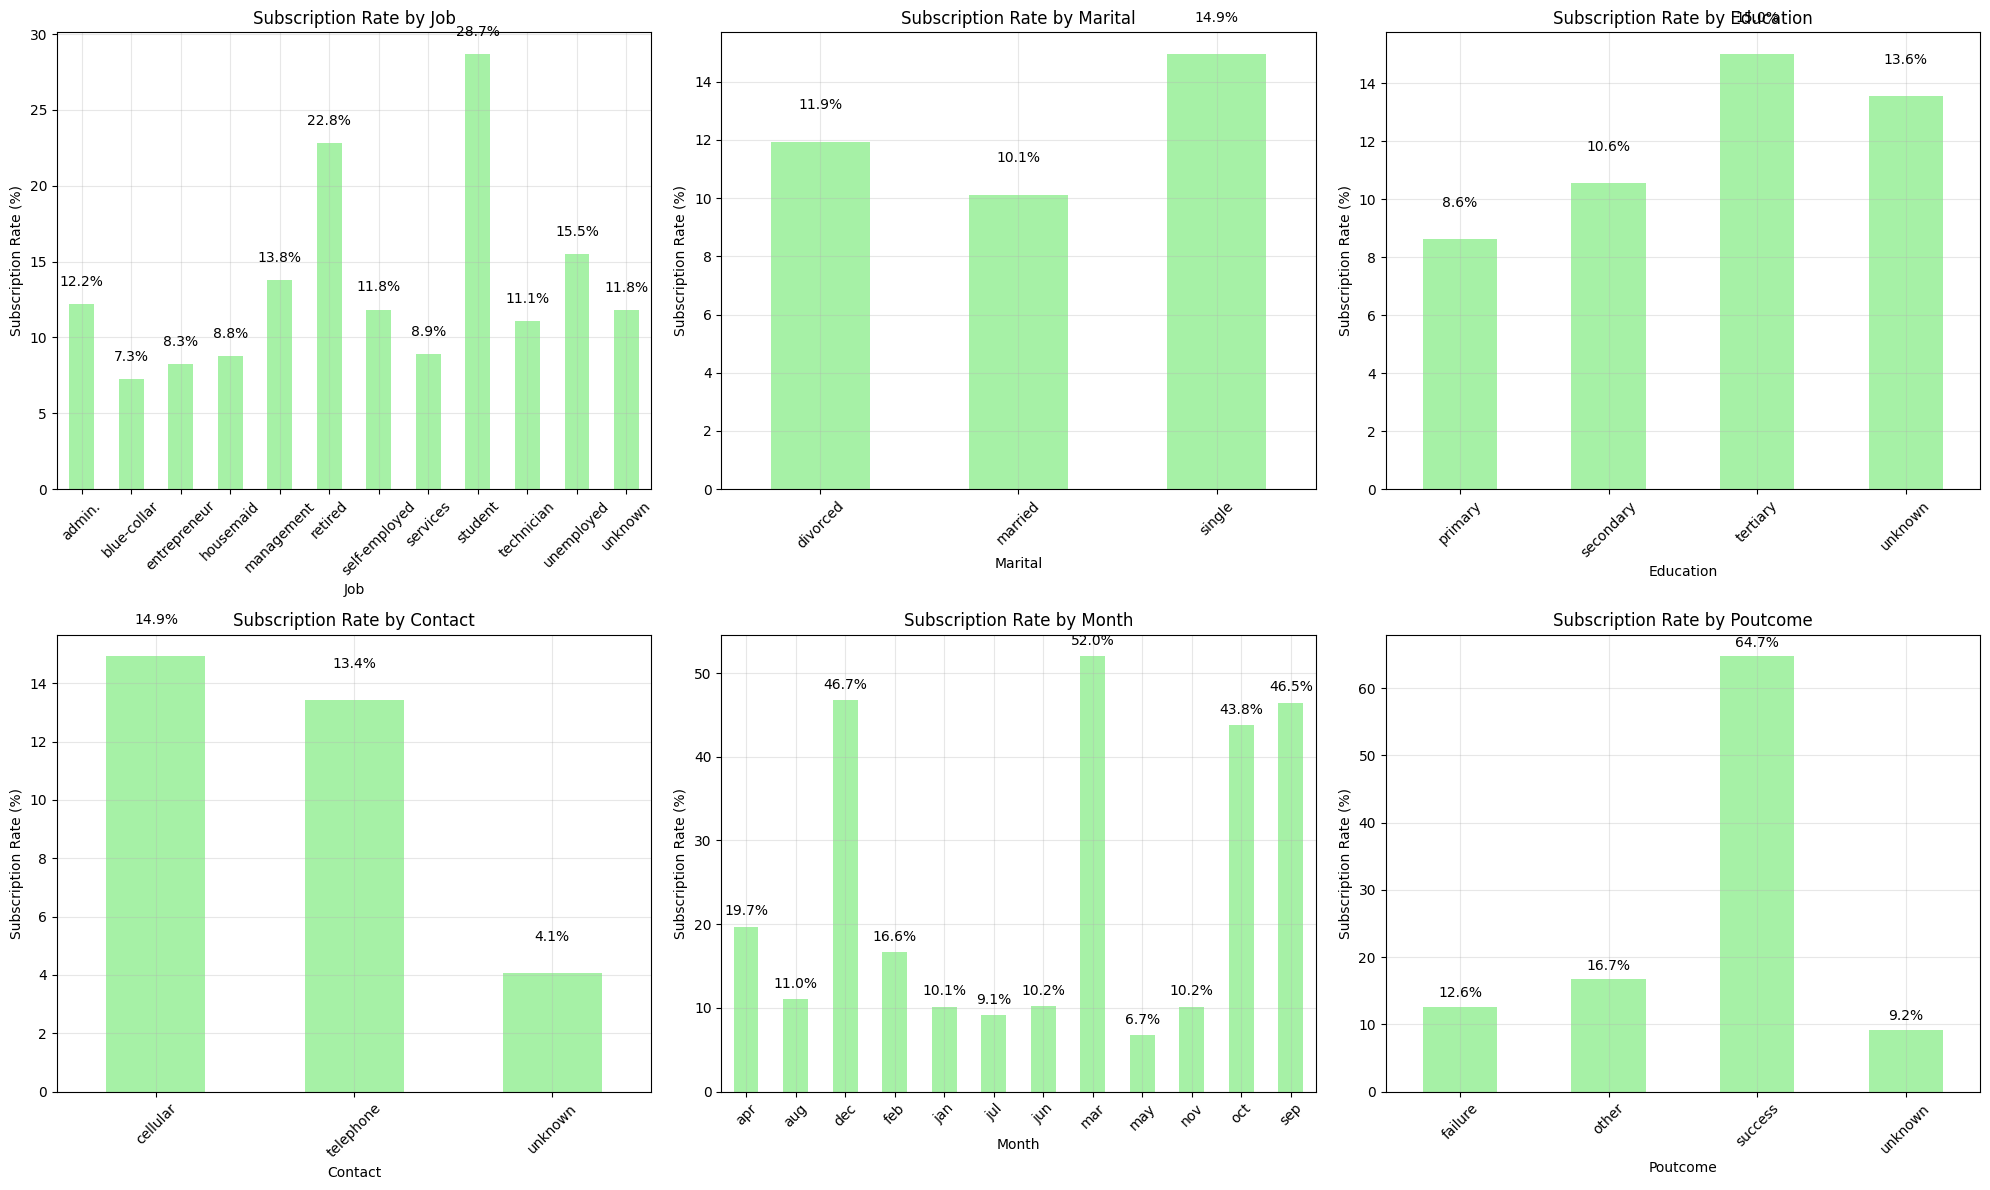


=== SUBSCRIPTION RATES BY CATEGORICAL FEATURES ===

JOB:
  student: 28.7%
  retired: 22.8%
  unemployed: 15.5%
  management: 13.8%
  admin.: 12.2%

MARITAL:
  single: 14.9%
  divorced: 11.9%
  married: 10.1%

EDUCATION:
  tertiary: 15.0%
  unknown: 13.6%
  secondary: 10.6%
  primary: 8.6%

CONTACT:
  cellular: 14.9%
  telephone: 13.4%
  unknown: 4.1%

MONTH:
  mar: 52.0%
  dec: 46.7%
  sep: 46.5%
  oct: 43.8%
  apr: 19.7%

POUTCOME:
  success: 64.7%
  other: 16.7%
  failure: 12.6%
  unknown: 9.2%


In [13]:
# Categorical features vs target variable - Subscription rates
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Calculate subscription rates
    cross_tab = pd.crosstab(df[feature], df['y'], normalize='index') * 100
    
    # Plot subscription rates
    cross_tab['yes'].plot(kind='bar', ax=axes[i], color='lightgreen', alpha=0.8)
    axes[i].set_title(f'Subscription Rate by {feature.title()}')
    axes[i].set_xlabel(feature.title())
    axes[i].set_ylabel('Subscription Rate (%)')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)
    
    # Add percentage labels on bars
    for idx, v in enumerate(cross_tab['yes']):
        axes[i].text(idx, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n=== SUBSCRIPTION RATES BY CATEGORICAL FEATURES ===")
for feature in categorical_features:
    print(f"\n{feature.upper()}:")
    cross_tab = pd.crosstab(df[feature], df['y'], normalize='index') * 100
    subscription_rates = cross_tab['yes'].sort_values(ascending=False)
    for category, rate in subscription_rates.head().items():
        print(f"  {category}: {rate:.1f}%")

## 6. Correlation Analysis with Target Variable

Analyzing correlations between features and the dependent variable (target) to identify the strongest predictive relationships.

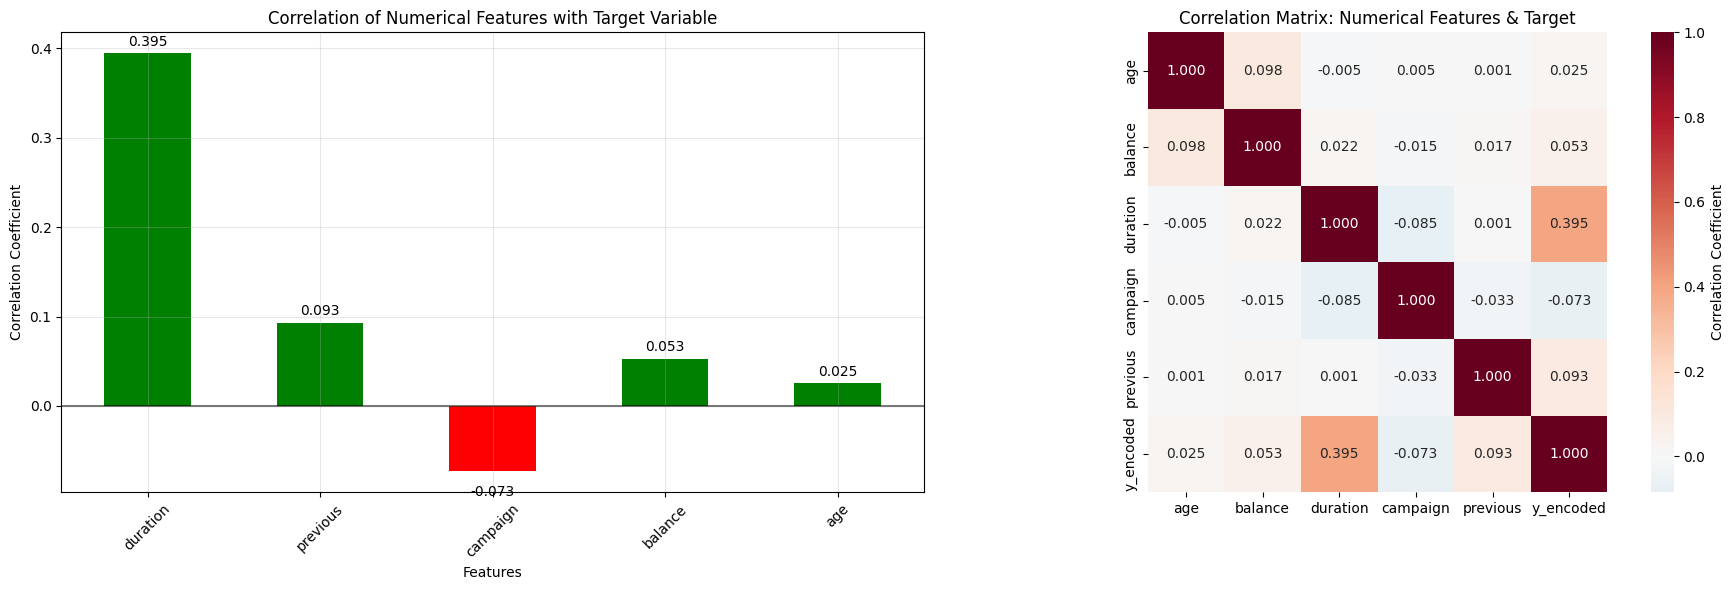


=== NUMERICAL FEATURES CORRELATION WITH TARGET ===
Features ranked by absolute correlation with target variable:
DURATION: 0.3945
PREVIOUS: 0.0932
CAMPAIGN: -0.0732
BALANCE: 0.0528
AGE: 0.0252


In [14]:
# Encode target variable for correlation analysis
df_corr = df.copy()
df_corr['y_encoded'] = df_corr['y'].map({'yes': 1, 'no': 0})

# Calculate correlations with target variable for numerical features
numerical_corr = df_corr[numerical_features + ['y_encoded']].corr()['y_encoded'].drop('y_encoded')
numerical_corr = numerical_corr.sort_values(key=abs, ascending=False)

# Visualization of numerical correlations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Bar plot of correlations
numerical_corr.plot(kind='bar', ax=ax1, color=['red' if x < 0 else 'green' for x in numerical_corr.values])
ax1.set_title('Correlation of Numerical Features with Target Variable')
ax1.set_xlabel('Features')
ax1.set_ylabel('Correlation Coefficient')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5)

# Add correlation values on bars
for i, v in enumerate(numerical_corr.values):
    ax1.text(i, v + 0.005 if v > 0 else v - 0.015, f'{v:.3f}', ha='center', va='bottom' if v > 0 else 'top')

# Heatmap of correlation matrix
corr_matrix = df_corr[numerical_features + ['y_encoded']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, ax=ax2, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
ax2.set_title('Correlation Matrix: Numerical Features & Target')

plt.tight_layout()
plt.show()

print("\n=== NUMERICAL FEATURES CORRELATION WITH TARGET ===")
print("Features ranked by absolute correlation with target variable:")
for feature, corr in numerical_corr.items():
    print(f"{feature.upper()}: {corr:.4f}")

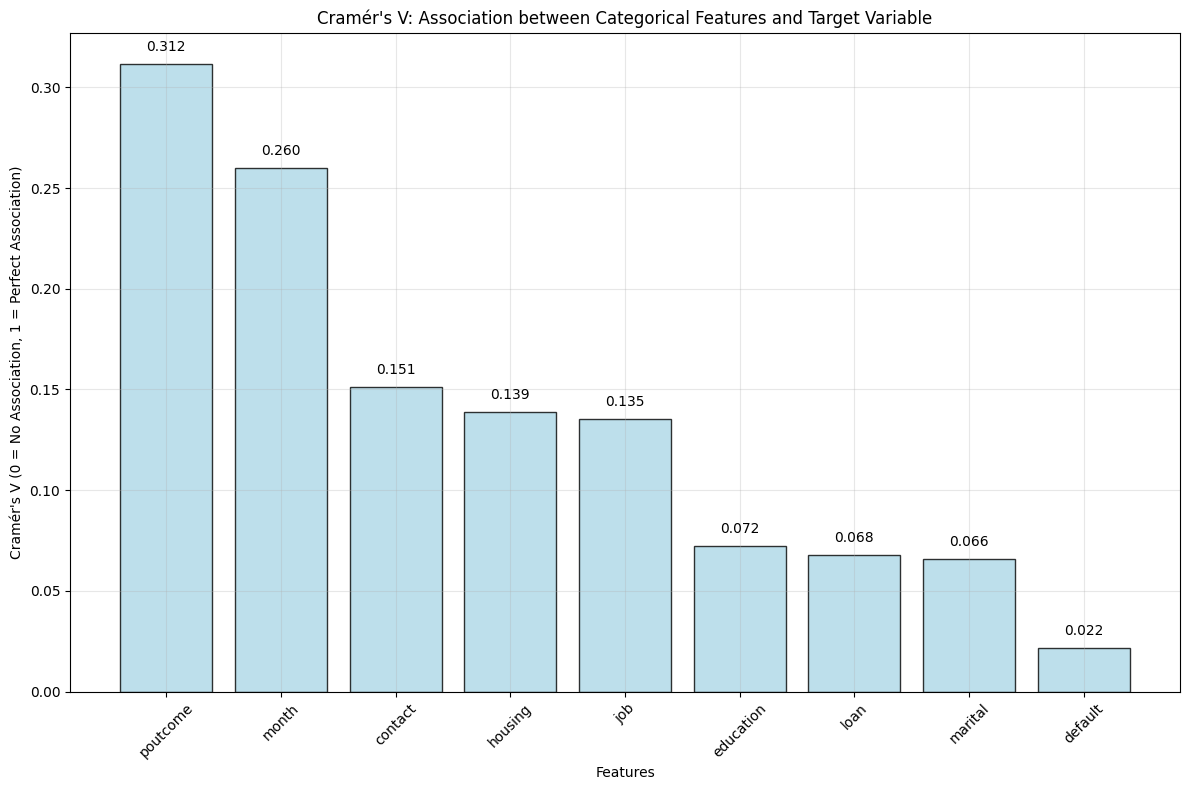


=== CATEGORICAL FEATURES ASSOCIATION WITH TARGET (Cramér's V) ===
Features ranked by association strength with target variable:
POUTCOME: 0.3116
MONTH: 0.2598
CONTACT: 0.1512
HOUSING: 0.1390
JOB: 0.1351
EDUCATION: 0.0722
LOAN: 0.0679
MARITAL: 0.0656
DEFAULT: 0.0217

Interpretation:
- Values closer to 0 indicate weak association
- Values closer to 1 indicate strong association
- Cramér's V > 0.1 suggests meaningful association


In [16]:
# Categorical correlation analysis using Cramér's V
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for categorical features
categorical_cramers = {}
for feature in categorical_features + ['default', 'housing', 'loan']:
    cramers = cramers_v(df[feature], df['y'])
    categorical_cramers[feature] = cramers

# Sort by Cramér's V values
categorical_cramers = dict(sorted(categorical_cramers.items(), key=lambda x: x[1], reverse=True))

# Visualization
fig, ax = plt.subplots(figsize=(12, 8))
features = list(categorical_cramers.keys())
values = list(categorical_cramers.values())

bars = ax.bar(features, values, color='lightblue', alpha=0.8, edgecolor='black')
ax.set_title("Cramér's V: Association between Categorical Features and Target Variable")
ax.set_xlabel('Features')
ax.set_ylabel("Cramér's V (0 = No Association, 1 = Perfect Association)")
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3)

# Add values on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n=== CATEGORICAL FEATURES ASSOCIATION WITH TARGET (Cramér's V) ===")
print("Features ranked by association strength with target variable:")
for feature, cramers in categorical_cramers.items():
    print(f"{feature.upper()}: {cramers:.4f}")
    
print("\nInterpretation:")
print("- Values closer to 0 indicate weak association")
print("- Values closer to 1 indicate strong association")
print("- Cramér's V > 0.1 suggests meaningful association")

In [17]:
# Combined feature importance summary
print("\n" + "="*70)
print("FEATURE IMPORTANCE SUMMARY FOR TARGET PREDICTION")
print("="*70)

print("\n🔢 TOP NUMERICAL FEATURES (by absolute correlation):")
top_numerical = numerical_corr.reindex(numerical_corr.abs().sort_values(ascending=False).index)
for i, (feature, corr) in enumerate(top_numerical.head(3).items(), 1):
    direction = "positive" if corr > 0 else "negative"
    print(f"{i}. {feature.upper()}: {corr:.4f} ({direction} correlation)")

print("\n📊 TOP CATEGORICAL FEATURES (by Cramér's V):")
for i, (feature, cramers) in enumerate(list(categorical_cramers.items())[:3], 1):
    strength = "strong" if cramers > 0.2 else "moderate" if cramers > 0.1 else "weak"
    print(f"{i}. {feature.upper()}: {cramers:.4f} ({strength} association)")

print("\n💡 KEY INSIGHTS:")
# Find strongest overall predictors
all_features = {**dict(numerical_corr.abs()), **categorical_cramers}
top_overall = sorted(all_features.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nTop 5 most predictive features overall:")
for i, (feature, score) in enumerate(top_overall, 1):
    feature_type = "numerical" if feature in numerical_features else "categorical"
    metric = "correlation" if feature_type == "numerical" else "Cramér's V"
    print(f"{i}. {feature.upper()} ({feature_type}): {score:.4f} {metric}")
    
print(f"\n⚠️  Class Imbalance Reminder:")
print(f"   Target distribution: {(df['y'] == 'yes').mean():.1%} positive class")
print(f"   This should be considered when interpreting correlations and building models.")


FEATURE IMPORTANCE SUMMARY FOR TARGET PREDICTION

🔢 TOP NUMERICAL FEATURES (by absolute correlation):
1. DURATION: 0.3945 (positive correlation)
2. PREVIOUS: 0.0932 (positive correlation)
3. CAMPAIGN: -0.0732 (negative correlation)

📊 TOP CATEGORICAL FEATURES (by Cramér's V):
1. POUTCOME: 0.3116 (strong association)
2. MONTH: 0.2598 (strong association)
3. CONTACT: 0.1512 (moderate association)

💡 KEY INSIGHTS:

Top 5 most predictive features overall:
1. DURATION (numerical): 0.3945 correlation
2. POUTCOME (categorical): 0.3116 Cramér's V
3. MONTH (categorical): 0.2598 Cramér's V
4. CONTACT (categorical): 0.1512 Cramér's V
5. HOUSING (categorical): 0.1390 Cramér's V

⚠️  Class Imbalance Reminder:
   Target distribution: 11.7% positive class
   This should be considered when interpreting correlations and building models.


## 7. Key Insights from EDA

Summary of important findings from the exploratory data analysis:

### Dataset Overview:
- **Size:** 45,211 observations with 17 features (16 predictors + 1 target)
- **Target Distribution:** Highly imbalanced with ~11.3% subscription rate
- **Data Quality:** No missing values detected

### Key Patterns Observed:
1. **Numerical Features:**
   - Age distribution is roughly normal with slight right skew
   - Balance shows extreme right skew with many zero values
   - Duration varies widely, suggesting different conversation lengths
   - Most clients were contacted 1-3 times in the campaign

2. **Categorical Features:**
   - Job distribution shows management and blue-collar as most common
   - Most clients are married
   - Secondary education is most prevalent
   - Cellular contact is the primary communication method

3. **Target Relationships:**
   - Subscription rates vary significantly across different feature categories
   - Duration appears to be a strong predictor (longer calls = higher subscription)
   - Different job types show varying subscription propensities

### Next Steps:
- Deeper analysis of correlations of features with dependant variable
- Deeper analysis of feature correlations
- Feature engineering and preprocessing
- Model development and evaluation